# Exercise 3.1 
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no chil- dren have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribu- tion for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.
Plot the actual and biased distributions, and compute their means.

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [5]:
resp = nsfg.ReadFemResp()

In [25]:
# creating pmf object for the number of children under 18 in the household.
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

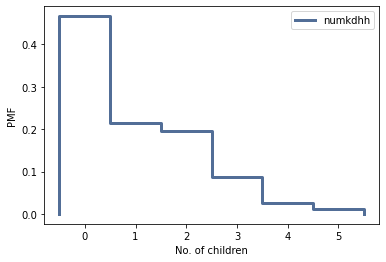

In [26]:
# plotting the pmf distribution for the number of children under 18 in the household.
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='No. of children', ylabel='PMF')

In [27]:
def BiasPmf(pmf, label):
    """function for calculating baised pmf."""
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [28]:
# creating biased pmf object.
biased = BiasPmf(pmf, label='biased')

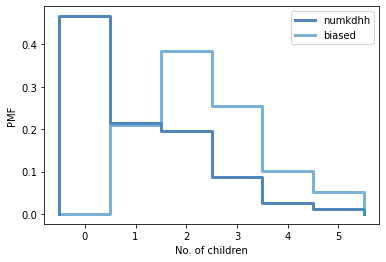

In [29]:
# plotting both actual pmf and biased pmf distributions.
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='No. of children', ylabel='PMF')

In [31]:
# Calculating the actual mean.
pmf.Mean()

1.024205155043831

In [32]:
# Calculating the biased mean.
biased.Mean()

2.403679100664282

# Exercise 3.2 

In Section 2.7 we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different:
x ̄ = 􏰄 p i x i i
where the xi are the unique values in the PMF and pi = PMF(xi). Similarly, you can compute variance like this:
S 2 = 􏰄 p i ( x i − x ̄ ) 2 i


Write functions called PmfMean and PmfVar that take a Pmf object and com- pute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.


In [6]:
def PmfMean(pmf):
    """Function for calculating the mean of a pmf."""
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean

def PmfVar(pmf, mu=None):
    """Function for calculating the variance of a pmf."""
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

# testing these methods to check if they are consistent with the methods Mean and Var provided by Pmf.
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
prglngth = live.prglngth
pmf = thinkstats2.Pmf(prglngth)
mean = PmfMean(pmf)
var = PmfVar(pmf)

print('User defined mean and var of pregnancy length:', mean, var)
print('Mean and Var pregnancy length provided by pmf:', pmf.Mean(), pmf.Var())

if mean == pmf.Mean() and var == pmf.Var():
    print('They are consistent.')

User defined mean and var of pregnancy length: 38.56055968517709 7.301863788195439
Mean and Var pregnancy length provided by pmf: 38.56055968517709 7.301863788195439
They are consistent.


# Exercise 4.1 

How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. 
Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.



In [13]:
live, firsts, others = first.MakeFrames()

# Getting the birth weights.
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()

# Calculating the pmf distributions of birth weights.
first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

# Calculating the cdf distributions of birth weights.
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

# Since I'm the first baby, I'm using first_cdf to find my percentile rank. 
print('My Percentile rank is:',first_cdf.PercentileRank(9))
# I apologized to my mom :).

My Percentile rank is: 93.1469172587669


# Exercise 4.2 

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

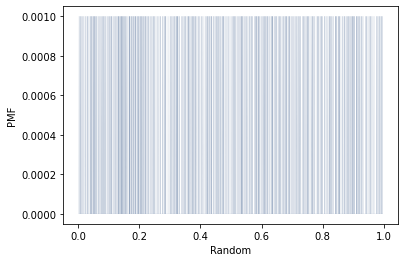

In [20]:
# Generating 1000 random numbers. 
r = np.random.random(1000)

# Plotting the random numbers pmf.
pmf = thinkstats2.Pmf(r)
thinkplot.Pmf(pmf, linewidth=0.05)
thinkplot.Config(xlabel='Random', ylabel='PMF')

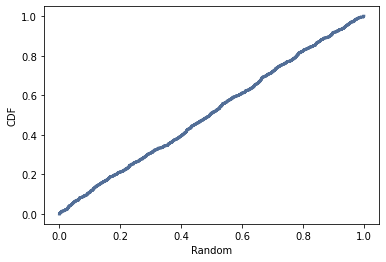

In [19]:
# Plotting the random numbers cdf.
cdf = thinkstats2.Cdf(r)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random', ylabel='CDF')

The above CDF is approximately a straight line, this means that the distribution is uniform.